In [92]:
import numpy as np
import napari
from napari.qt import thread_worker
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
from PyQt5.QtWidgets import QApplication, QWidget, QVBoxLayout, QPushButton
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvasQT

class ScatterPlotWidget(QWidget):
    def __init__(self):
        super().__init__()

        # Set up layout
        self.layout = QVBoxLayout(self)

        # Create Napari viewer
        self.viewer = napari.Viewer()

        # Create Matplotlib figure and canvas
        self.fig = Figure()  # Fixed the typo here
        self.ax = self.fig.add_subplot(111)
        self.canvas = FigureCanvasQT(self.fig)

        # Create scatter plot with random points
        self.scatter = self.ax.scatter(
            np.random.rand(100), np.random.rand(100), s=50, c='b', alpha=0.5
        )

        # Create button to update scatter plot
        self.update_button = QPushButton('Update Scatter Plot')
        self.update_button.clicked.connect(self.update_scatter_plot_worker)

        # Add widgets to layout
        self.layout.addWidget(self.viewer.window.qt_viewer)
        self.layout.addWidget(self.canvas)
        self.layout.addWidget(self.update_button)


    def update_scatter_plot_worker(self):
        # Update scatter plot with new random positions
        x_new, y_new = np.random.rand(100), np.random.rand(100)
        self.scatter.set_offsets(np.column_stack((x_new, y_new)))
        self.canvas.draw_idle()

if __name__ == "__main__":
    # Create a QApplication instance before creating any QWidget
    app = QApplication([])

    # Create the widget
    scatter_widget = ScatterPlotWidget()

    # Show the widget
    scatter_widget.show()

    # Run the Napari viewer
    napari.run()


C:\Users\ge37voy\AppData\Local\Temp\ipykernel_38984\4226585991.py:34: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.layout.addWidget(self.viewer.window.qt_viewer)


In [95]:
FigureCanvas

matplotlib.backends.backend_agg.FigureCanvasAgg

In [94]:
scatter_widget.scatter.set_offsets(np.column_stack((np.random.rand(100), np.random.rand(100))))
scatter_widget.canvas.draw_idle()

## Nice code from ChatGPT:

In [116]:
import napari
from PyQt5.QtWidgets import QWidget, QVBoxLayout, QLabel, QPushButton
import numpy as np

class LegendWidget(QWidget):
    def __init__(self, colors, parent=None):
        super().__init__(parent)
        self.colors = colors
        self.setup_ui()

    def setup_ui(self):
        layout = QVBoxLayout()

        for color in self.colors:
            color_label = QLabel()
            color_label.setStyleSheet(f'background-color: {color}; width: 30px; height: 30px;')
            layout.addWidget(color_label)

        # Add the "Change Legend Colors" button
        button = QPushButton('Change Legend Colors')
        button.clicked.connect(self.change_colors)
        layout.addWidget(button)

        self.setLayout(layout)

    def update_colors(self, new_colors):
        layout = self.layout()
        for i in range(len(new_colors)):
            color_label = layout.itemAt(i).widget()
            color_label.setStyleSheet(f'background-color: {new_colors[i]}; width: 30px; height: 30px;')

    def change_colors(self):
        new_colors = generate_random_colors()
        self.update_colors(new_colors)

def generate_random_colors():
    return ['#' + ''.join(np.random.choice(list('0123456789ABCDEF'), size=6)) for _ in range(5)]

# Create Napari viewer
viewer = napari.Viewer()

# Add an image to the viewer (you can replace this with your own data)
data = np.random.random((512, 512))
viewer.add_image(data, name='Random Image')

# Create the initial legend widget
initial_colors = ['#d62728', '#ff9896', '#ff9896', '#98df8a', '#98df8a']
legend_widget = LegendWidget(initial_colors)
viewer.window.add_dock_widget(legend_widget, area='right')

# Run the viewer
napari.run()


In [117]:
import napari
import numpy as np
from PyQt5.QtWidgets import QWidget, QVBoxLayout, QPushButton
from matplotlib.figure import Figure
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas

class LegendWidget(QWidget):
    def __init__(self, colors, parent=None):
        super().__init__(parent)
        self.colors = colors
        self.setup_ui()

    def setup_ui(self):
        # Create a matplotlib figure and canvas
        self.figure, _ = Figure(), FigureCanvas(Figure())
        self.ax = self.figure.add_subplot(111)

        # Create a legend with the specified colors
        self.legend = self.ax.legend([''] * len(self.colors), loc='center', frameon=False)

        # Set the legend colors and labels
        handles = []
        for color in self.colors:
            line, = self.ax.plot([], [], color=color, label='')
            handles.append(line)

        self.legend.get_lines()[0].set_color(self.colors[0])  # Set the first color
        for i, handle in enumerate(self.legend.legendHandles):
            handle.set_color(self.colors[i])
            handle.set_label(f'Label {i}')  # Set labels for each line

        # Add the "Change Legend Colors" button
        button = QPushButton('Change Legend Colors')
        button.clicked.connect(self.change_colors)

        # Create layout and add the matplotlib canvas and button
        layout = QVBoxLayout()
        layout.addWidget(self.figure.canvas)
        layout.addWidget(button)

        self.setLayout(layout)

    def change_colors(self):
        new_colors = generate_random_colors()

        # Update the legend colors and labels
        for i, handle in enumerate(self.legend.legendHandles):
            handle.set_color(new_colors[i])
            handle.set_label(f'Label {i}')

        # Redraw the canvas
        self.figure.canvas.draw()

def generate_random_colors():
    return ['#' + ''.join(np.random.choice(list('0123456789ABCDEF'), size=6)) for _ in range(5)]

# Create Napari viewer
viewer = napari.Viewer()

# Add an image to the viewer (you can replace this with your own data)
data = np.random.random((512, 512))
viewer.add_image(data, name='Random Image')

# Create the initial legend widget
initial_colors = ['#d62728', '#ff9896', '#ff9896', '#98df8a', '#98df8a']
legend_widget = LegendWidget(initial_colors)
viewer.window.add_dock_widget(legend_widget, area='right')

# Run the viewer
napari.run()


IndexError: list index out of range

In [ ]:
legend_widget.legend.set

In [93]:
scatter_widget

In [14]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from insitupy.palettes import CustomPalettes

In [122]:
# create random colorlegend
palettes = CustomPalettes()
colors = palettes.tab20_mod.colors
colors = np.random.choice(colors, 5)

handles = [Line2D([0], [0], 
                marker='o', 
                color='w', 
                label=l,
                markerfacecolor=c, 
                markeredgewidth=0,
                linewidth=0,
                markersize=15) for c, l in zip(colors, colors)]

In [119]:
# Create Matplotlib figure and canvas
fig = Figure()  # Fixed the typo here
ax = fig.add_subplot(111)
canvas = FigureCanvasQT(fig)
leg = ax.legend(handles=handles)

In [ ]:
leg.

In [126]:
ax.set_

<Axes: >

In [123]:
leg.figure.canvas.draw()

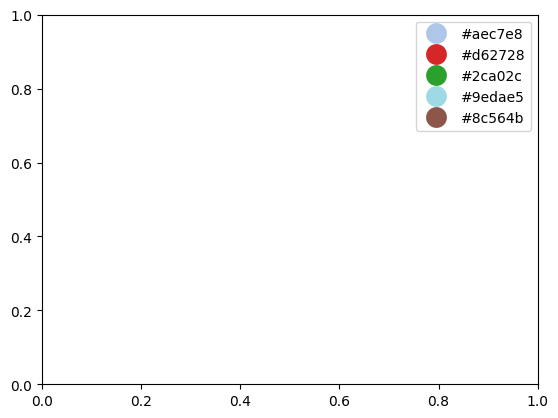

In [124]:
fig

In [90]:
ax.legend(handles=handles)

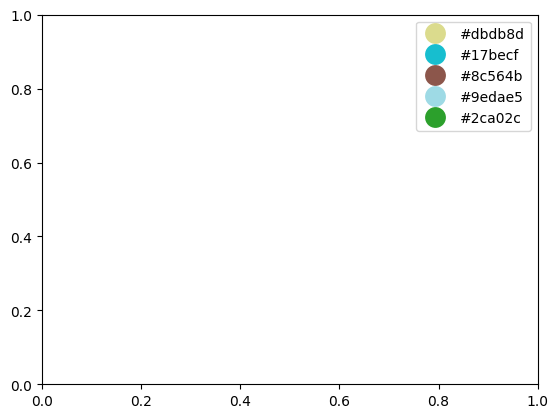

In [91]:
fig

In [78]:
leg._init_legend_box(handles=handles, labels=colors)

In [81]:
handles, labels = leg

TypeError: cannot unpack non-iterable Legend object

In [80]:
ax.get_legend_handles_labels()

([], [])

In [50]:
ax.scatter(np.random.rand(50), np.random.rand(50))

In [51]:
colors

array(['#1f77b4', '#c5b0d5', '#bcbd22', '#dbdb8d', '#d62728'], dtype='<U7')

In [54]:
leg = ax.legend(handles=handles)

In [57]:
leg.get_lines()[0]

In [64]:
leg.update_default_handler_map()

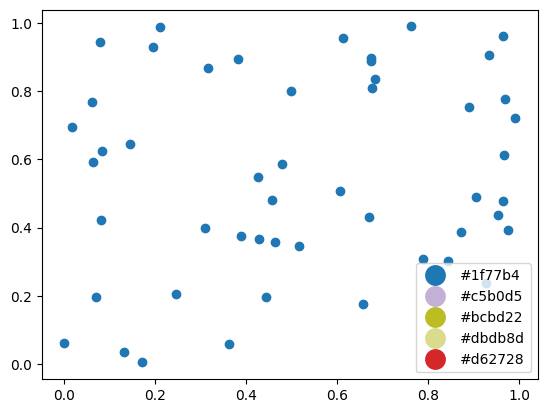

In [53]:
fig

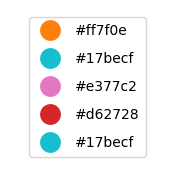

In [18]:
handles = [Line2D([0], [0], 
                marker='o', 
                color='w', 
                label=l,
                markerfacecolor=c, 
                markeredgewidth=0,
                linewidth=0,
                markersize=15) for c, l in zip(colors, colors)]
    
# create new subplot
fig, ax = plt.subplots(1,1,figsize=(2,2))

ax.legend(handles=handles, 
            loc="center", 
            labelspacing=1, 
            borderpad=0.5,
            ncol=1
            )
ax.set_axis_off()

In [27]:
ax.add_l

TypeError: add_line() missing 1 required positional argument: 'line'

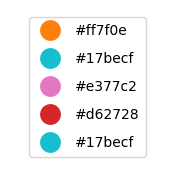

In [20]:
fig

In [28]:
scatter_widget.scatter

In [4]:
scatter_widget.show()

In [2]:
import napari
from qtpy.QtWidgets import QLabel, QPushButton, QWidget, QVBoxLayout
from matplotlib.backends.backend_qt5agg import FigureCanvas

viewer = napari.Viewer()

class Mywidget(QWidget):
    def __init__(self, napari_viewer):
        super().__init__()
        self._viewer = napari_viewer
        #self.lbl = QLabel('hey', self)
        self.btn = QPushButton('remove', self)
        self.random = QPushButton('random', self)
        self.shuf = QPushButton('shuffle', self)
        self.btn.clicked.connect(self.remove)
        self.random.clicked.connect(self.add_random_legend)
        self.shuf.clicked.connect(self.shuffle)

        self.build()
        
    def build(self):
        self.vbox = QVBoxLayout()
        #vbox.addWidget(self.lbl)
        self.vbox.addWidget(self.btn)
        self.vbox.addWidget(self.random)
        self.vbox.addWidget(self.shuf)
        #self.vbox.addWidget(FigureCanvas(clb_fig))
        self.setLayout(self.vbox)
        self.show()
    
    def remove(self):
        # I want to delete widget here
        # Then add new widget
        self._viewer.window.remove_dock_widget(self)
        
    def add_random_legend(self):
        # create random colorlegend
        palettes = CustomPalettes()
        colors = palettes.tab20_mod.colors
        color_list = np.random.choice(colors, 5)
        clb_fig = colorlegend_mpl(colors=color_list, labels=color_list)
        self.clb_widget = FigureCanvas(clb_fig)
        self.vbox.addWidget(self.clb_widget)
        
    def shuffle(self):
        # shuffle color legend
        # create random colorlegend
        palettes = CustomPalettes()
        colors = palettes.tab20_mod.colors
        color_list = np.random.choice(colors, 5)
        clb_fig = colorlegend_mpl(colors=color_list, labels=color_list)
        self.clb_widget = FigureCanvas(clb_fig)
        self.clb_widget.figure.canvas.draw()
        self.clb_widget.draw()
        
widget = Mywidget(viewer)
viewer.window.add_dock_widget(widget=widget)

C:\Users\ge37voy\AppData\Local\Temp\ipykernel_38588\4256669455.py:34: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.layout.addWidget(self.viewer.window.qt_viewer)


In [1]:
import napari

from nilearn import datasets
from nilearn import surface

from qtpy.QtWidgets import QVBoxLayout, QWidget
import vispy as vp
from vispy import scene
from vispy.scene import widgets
import numpy as np

nki_dataset = datasets.fetch_surf_nki_enhanced(n_subjects=1)
fsaverage = datasets.fetch_surf_fsaverage()

brain_vertices, brain_faces = surface.load_surf_data(fsaverage['pial_left'])
timeseries = surface.load_surf_data(nki_dataset['func_left'][0])
timeseries = timeseries.transpose((1, 0))

COLORMAP_STEP = 8

def axis_changed(event):

    idx_max = viewer.dims.range[0][1]
    idx = viewer.dims.current_step[0]

    if idx < idx_max and layer.visible:
        random_number = np.round(np.random.random(), decimals=1)
        colorbar1.clim = (random_number, random_number+1)
        colorbar2.clim = (random_number, random_number+1)
        colorbar3.clim = (random_number, random_number+1)

with napari.gui_qt():

    viewer = napari.Viewer(ndisplay=3)

    # COLORBARS
    width = 300
    height = 50
    padding = (.4, .4)
    ratio = 0.1

    canvas1 = scene.SceneCanvas(size=(width, height))
    cmap1 = vp.color.get_colormap('turbo')
    colorbar1 = widgets.ColorBarWidget(cmap1, 'top', "", 'white',
                        clim=(0, 1),
                        border_width=1.,
                        border_color='yellow',
                        padding=padding,
                        axis_ratio=ratio
                        )
    canvas1.central_widget.add_widget(colorbar1)

    canvas2 = scene.SceneCanvas(size=(width, height))
    cmap2 = vp.color.get_colormap('turbo')
    colorbar2 = widgets.ColorBarWidget(cmap2, 'top', "", 'white',
                        clim=(0, 1),
                        border_width=1.,
                        border_color='yellow',
                        padding=padding,
                        axis_ratio=ratio
                        )
    canvas2.central_widget.add_widget(colorbar2)

    canvas3 = scene.SceneCanvas(size=(width, height))
    base_cmap = vp.color.get_colormap('gist_rainbow')
    colors = base_cmap[np.linspace(0., 1., num=COLORMAP_STEP)]
    cmap3 = vp.color.Colormap(colors, interpolation='zero')
    colorbar3 = widgets.ColorBarWidget(cmap3, 'top', "", 'white',
                        clim=(0, 1),
                        border_width=1.,
                        border_color='yellow',
                        padding=padding,
                        axis_ratio=ratio
                        )
    canvas3.central_widget.add_widget(colorbar3)

    layout = QVBoxLayout()
    colorbars_widget = QWidget()
    layout.addWidget(canvas1.native)
    layout.addWidget(canvas2.native)
    layout.addWidget(canvas3.native)
    colorbars_widget.setLayout(layout)

    layer = viewer.add_surface((brain_vertices, brain_faces, timeseries))
    layer.colormap = ('custom', cmap1)

    viewer.dims.events.axis.connect(axis_changed)

    colorbars_widget.setFixedWidth(300)
    colorbars_widget.setFixedHeight(200)
    
    colorbars_dock = viewer.window.add_dock_widget(colorbars_widget, name='Colorbars', area = 'left')

c:\Users\ge37voy\AppData\Local\miniconda3\envs\napari\lib\contextlib.py:119: FutureWarning: 
The 'gui_qt()' context manager is deprecated.
If you are running napari from a script, please use 'napari.run()' as follows:

    import napari

    viewer = napari.Viewer()  # no prior setup needed
    # other code using the viewer...
    napari.run()

In IPython or Jupyter, 'napari.run()' is not necessary. napari will automatically
start an interactive event loop for you: 

    import napari
    viewer = napari.Viewer()  # that's it!

  return next(self.gen)


In [5]:
from skimage import data
import numpy as np
import napari

# set parameters for point generation
n_points = 100
n_clusters = 4
points = np.random.rand(n_points, 2) * 100

# start viewer
viewer = napari.view_image(data.astronaut(), rgb=True)

# set point properties
point_properties = {
    'abc': np.random.choice([str(elem) for elem in np.arange(n_clusters)], n_points)
}

# add points
points_layer = viewer.add_points(
    points,
    properties=point_properties,
    face_color='abc',
    face_color_cycle=['magenta', 'green', 'yellow', 'blue'],
    edge_width=0.1,
)